In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [3]:
# loading the letters dataset and assign it to "letters" variable
letters = pd.read_csv('train_1.csv')
letters.head()

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.819,1.820,1.821,1.822,1.823,1.824,1.825,1.826,1.827,1.828
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,14
1,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,1,1,1,4
2,1,1,1,1,1,1,0,0,0,1,...,1,1,0,0,0,1,1,1,1,12
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,20
4,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,1,1,1,14


In [4]:
# getting the class column
y_train = letters.iloc[:,-1:]
y_train

,1.828
0,14
1,4
2,12
3,20
4,14
...,...
1191,6
1192,6
1193,1
1194,1


In [5]:
x_train = letters.iloc[:,:-1]
x_train

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.818,1.819,1.820,1.821,1.822,1.823,1.824,1.825,1.826,1.827
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0,0,0,1,...,1,1,1,0,0,0,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
1192,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,1,1,1,1
1193,1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
1194,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
validate_1 = pd.read_csv('val_1.csv')
validate_1.head()

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.834,1.835,1.836,1.837,1.838,1.839,1.840,1.841,1.842,1.843
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,17
1,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,0,0,1,1,1,12
2,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,12
3,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,16


In [7]:
x_validate = validate_1.iloc[:,:-1]
x_validate

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.833,1.834,1.835,1.836,1.837,1.838,1.839,1.840,1.841,1.842
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
1,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
234,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
235,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
236,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
y_validate = validate_1.iloc[:,-1:]
y_validate

,1.843
0,17
1,12
2,12
3,1
4,16
...,...
233,21
234,24
235,2
236,8


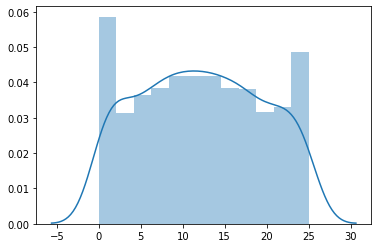

In [9]:
sns.distplot(y_train)

In [10]:
model = GaussianNB()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
results = model.predict(x_validate)
results

array([17, 22,  1,  1, 16, 17, 25, 14,  9,  3,  4, 22, 12, 25, 17, 16, 15,
       11, 25,  5,  8, 19, 21, 24, 12, 15, 18, 14,  4, 15, 20, 20, 17, 24,
       17, 10, 13,  8, 23,  3,  8, 18, 20, 17,  1, 25, 22,  8,  2, 10, 21,
       13,  0, 16, 12,  2,  6,  3, 14, 11, 12,  3, 13, 12, 14,  1, 16, 22,
       11, 10, 17,  3,  1,  1, 18,  8,  4, 25, 14,  1, 12,  5, 25,  7, 12,
       17, 18,  3, 12, 19,  0, 23,  5, 25, 12,  2, 12, 21, 25, 16, 16, 12,
       13,  7, 15, 12,  9,  0, 13,  5,  1, 11, 14, 22, 21, 10, 15, 18, 10,
        0, 15, 11, 17, 17, 11, 14,  7, 25, 22, 12, 16, 17,  5, 12,  8, 22,
       10, 23, 12,  0,  8,  1,  1,  3,  6,  6,  1,  3,  6, 22,  1, 12, 15,
        5,  9,  4,  8, 14, 22, 13, 25,  0,  0, 12, 16,  4, 11, 13,  1, 15,
       22,  6, 25, 16, 15, 14, 19,  3,  6,  3,  1,  4, 12, 24, 12, 11, 22,
       18, 12, 12, 15, 22, 15,  9, 22, 14, 10, 12,  1,  8,  1,  1,  0,  7,
        1,  9,  2, 16, 12, 15, 12, 10, 16, 11,  6,  8,  9, 16, 24,  0, 19,
        2, 13, 12,  1, 12

In [12]:
y_validate.head(15)

,1.843
0,17
1,12
2,12
3,1
4,16
5,17
6,25
7,14
8,9
9,3


In [13]:
model.score(x_validate,y_validate)    # gives the percentage of similarity between two sets

0.6764705882352942

In [14]:
print(classification_report(y_validate,results))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.37      0.88      0.52         8
           2       1.00      0.60      0.75        10
           3       0.73      1.00      0.84         8
           4       0.83      0.62      0.71         8
           5       0.71      0.62      0.67         8
           6       1.00      0.70      0.82        10
           7       1.00      0.44      0.62         9
           8       0.82      0.90      0.86        10
           9       1.00      0.60      0.75        10
          10       0.78      0.70      0.74        10
          11       1.00      1.00      1.00        10
          12       0.15      0.40      0.22        10
          13       0.75      0.60      0.67        10
          14       0.64      0.70      0.67        10
          15       0.75      0.90      0.82        10
          16       0.58      0.70      0.64        10
          17       0.55    

In [15]:
print(confusion_matrix(y_validate,results))

[[ 5  1  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  2  0  0  0  0  0  0
   0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  6  0  1  0  0  0  0  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  2  0  0  5  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  5  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  7  0  0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  0
   0  0]
 [ 1  1  0  0  0  0  0  4  0  0  0  0  2  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  1  0  0  0  1  0  0  0  6  0  0  1  0  0  0  1  0  0  0  0  0  0  0
   0  0]
 [ 1  0  0  1  0  0  0  0  0  0  7  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1

In [55]:
symbols = pd.read_csv('train_2.csv')

In [56]:
symbols.head()

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,0,...,1.864,1.865,1.866,1.867,1.868,1.869,1.870,1.871,1.872,9
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,9
2,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,4
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,9
4,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,8


In [57]:
# getting the class column
y_train_symbols = symbols.iloc[:,-1:]
y_train_symbols

,9
0,0
1,9
2,4
3,9
4,8
...,...
7794,9
7795,6
7796,5
7797,4


In [58]:
x_train_symbols = symbols.iloc[:,:-1]
x_train_symbols

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,0,...,1.863,1.864,1.865,1.866,1.867,1.868,1.869,1.870,1.871,1.872
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
7795,1,1,1,1,1,1,1,1,0,0,...,1,0,0,0,1,1,1,1,1,1
7796,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7797,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1


In [59]:
test_with_label_2 = pd.read_csv('test_with_label_2.csv')
test_with_label_2.head()

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,0.171,0.172,0.173,1.844,1.845,1.846,1.847,1.848,1.849,9
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,9
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [60]:
x_test_symbols= test_with_label_2.iloc[:,:-1]
x_test_symbols

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,0.170,0.171,0.172,0.173,1.844,1.845,1.846,1.847,1.848,1.849
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
515,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
516,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
517,1,1,1,1,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1


In [61]:
y_test_symbols = test_with_label_2.iloc[:,-1:]
y_test_symbols

,9
0,0
1,4
2,5
3,9
4,1
...,...
514,0
515,1
516,9
517,6


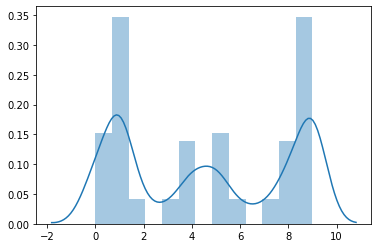

In [62]:
sns.distplot(y_train_symbols)

In [64]:
model.fit(x_train_symbols,y_train_symbols)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
results_symbols = model.predict(x_test_symbols)
results_symbols

array([3, 0, 5, 9, 3, 1, 3, 6, 9, 0, 1, 3, 9, 2, 3, 9, 9, 7, 1, 6, 1, 2,
       7, 9, 2, 1, 1, 2, 2, 9, 2, 2, 9, 2, 1, 6, 9, 1, 1, 3, 7, 4, 5, 9,
       9, 1, 3, 6, 1, 0, 4, 5, 9, 0, 0, 8, 5, 6, 1, 1, 6, 3, 0, 6, 1, 1,
       9, 0, 0, 3, 0, 1, 9, 5, 2, 9, 1, 3, 4, 1, 1, 4, 6, 4, 6, 9, 0, 7,
       6, 8, 9, 1, 1, 5, 1, 9, 6, 0, 0, 0, 2, 2, 9, 9, 5, 6, 5, 5, 4, 1,
       9, 4, 5, 8, 5, 8, 0, 2, 9, 1, 9, 4, 9, 1, 1, 6, 9, 4, 9, 1, 1, 6,
       1, 9, 1, 4, 6, 0, 2, 5, 3, 1, 9, 9, 4, 9, 9, 5, 1, 1, 5, 9, 1, 6,
       3, 1, 5, 5, 3, 0, 2, 1, 1, 1, 1, 1, 1, 9, 0, 5, 9, 9, 4, 4, 1, 1,
       3, 2, 5, 9, 1, 9, 9, 4, 1, 9, 9, 4, 3, 1, 9, 1, 6, 5, 7, 9, 7, 6,
       9, 6, 0, 9, 0, 5, 5, 2, 1, 5, 3, 4, 6, 3, 0, 9, 3, 2, 1, 0, 9, 2,
       1, 6, 4, 5, 3, 2, 5, 4, 1, 9, 1, 4, 9, 1, 6, 6, 9, 2, 0, 2, 3, 9,
       6, 1, 1, 5, 4, 9, 7, 9, 1, 1, 1, 9, 0, 9, 3, 1, 1, 9, 0, 1, 1, 6,
       6, 9, 2, 7, 1, 5, 4, 5, 1, 7, 1, 5, 2, 9, 5, 0, 3, 6, 6, 3, 9, 0,
       1, 9, 1, 3, 9, 2, 8, 1, 9, 1, 0, 8, 9, 3, 5,

In [66]:
y_test_symbols.head(15)

,9
0,0
1,4
2,5
3,9
4,1
5,1
6,3
7,8
8,9
9,0


In [67]:
model.score(x_test_symbols,y_test_symbols) 

0.6685934489402697

In [70]:
print(classification_report(y_test_symbols,results_symbols))

              precision    recall  f1-score   support

           0       0.60      0.47      0.53        55
           1       0.93      0.89      0.91       125
           2       0.28      0.80      0.41        15
           3       0.34      0.93      0.50        15
           4       0.59      0.40      0.48        50
           5       0.76      0.62      0.68        55
           6       0.24      0.73      0.37        15
           7       1.00      0.93      0.97        15
           8       0.88      0.30      0.45        50
           9       0.77      0.73      0.75       124

    accuracy                           0.67       519
   macro avg       0.64      0.68      0.60       519
weighted avg       0.75      0.67      0.68       519



In [71]:
print(confusion_matrix(y_test_symbols,results_symbols))

[[ 26   4   1  14   8   1   0   0   1   0]
 [  6 111   1   6   0   1   0   0   0   0]
 [  0   0  12   0   1   0   0   0   1   1]
 [  1   0   0  14   0   0   0   0   0   0]
 [  2   0   1   6  20   2   4   0   0  15]
 [  0   0   1   1   1  34   8   0   0  10]
 [  3   1   0   0   0   0  11   0   0   0]
 [  0   1   0   0   0   0   0  14   0   0]
 [  1   2  26   0   0   0   5   0  15   1]
 [  4   1   1   0   4   7  17   0   0  90]]


In [1]:
#test test 